# Libs and Modules

In [6]:
!pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 2.5 MB/s eta 0:00:00


In [5]:
!pip install demoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 576.3 kB/s eta 0:00:00


In [3]:
#!pip install emoji --upgrade
#26 march latest

In [61]:
import pandas as pd
import json
import re
import string
import demoji
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import emoji
from collections import Counter

# File upload and initial dataframes

In [9]:
with open('/content/White.json', 'r') as file:
    data_white = json.load(file)
with open('/content/Latin.json', 'r') as file:
    data_latin = json.load(file)

extracted_data_white = []
extracted_data_latin = []

for entry in data_white:
    user = entry.get('user', {})
    name = user.get('name', None)
    location = user.get('location', None)
    description = user.get('description', None)
    full_text = entry.get('full_text', None)

    extracted_data_white.append({
        'name': name,
        'location': location,
        'description': description,
        'full_text': full_text
    })

for entry in data_latin:
    user = entry.get('user', {})
    name = user.get('name', None)
    location = user.get('location', None)
    description = user.get('description', None)
    full_text = entry.get('full_text', None)

    extracted_data_latin.append({
        'name': name,
        'location': location,
        'description': description,
        'full_text': full_text
    })
df_white = pd.DataFrame(extracted_data_white)
df_latin = pd.DataFrame(extracted_data_latin)
print(df_white)

                            name                       location  \
0     𝕯𝖗 𝖔𝖋 𝕮𝖗𝖎𝖙𝖎𝖈𝖆𝖑 𝕭𝖆𝖘𝖘 𝕿𝖍𝖊𝖔𝖗𝖞                North Yorkshire   
1                  Shawn Hawkins  In Liberal Heads, RENT FREE!🤣   
2                  Shawn Hawkins  In Liberal Heads, RENT FREE!🤣   
3                  Shawn Hawkins  In Liberal Heads, RENT FREE!🤣   
4          𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏         Live 🌿 Love💋Sparkle ⭐️   
...                          ...                            ...   
1564               Murline Revis                                  
1565               Murline Revis                                  
1566               Murline Revis                                  
1567               Murline Revis                                  
1568               Murline Revis                                  

                                            description  \
0        Phd in theories of critical bass. Ex junglist.   
1     Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...   
2     Pvt Mil Ctr 

In [10]:
df_latin

,name,location,description,full_text
0,Astrid Galván,"El Paso, TX",Editor at Axios Latino. Former AP reporter.,"🧵 In 42 minutes, Axios Latino is publishing a ..."
1,Jackie Montalvo | ᜇᜒᜌᜃᜒ,"New York, NY",Producer-Shooter-Editor @NBCNewsNow @NBCNews @...,Still crying 😭🥹 so so thankful !!!!
2,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",I applaud former Vice President @JoeBiden for ...
3,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",Dolores Huerta: Recall of Newsom would be bad ...
4,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",Vote NO on the CA Special Recall Election. Our...
...,...,...,...,...
2608,Russell Contreras,"Albuquerque, NM",.@Axios Race and Justice reporter/ Axios Latin...,#NM Republican @Yvette4congress goes on Fox Ne...
2609,Russell Contreras,"Albuquerque, NM",.@Axios Race and Justice reporter/ Axios Latin...,And let’s not forget the Plan de San Diego in ...
2610,Russell Contreras,"Albuquerque, NM",.@Axios Race and Justice reporter/ Axios Latin...,This was a deeply personal story to research a...
2611,Russell Contreras,"Albuquerque, NM",.@Axios Race and Justice reporter/ Axios Latin...,Cuban Americans in South Florida were outraged...


In [11]:
df_white.head()

,name,location,description,full_text
0,𝕯𝖗 𝖔𝖋 𝕮𝖗𝖎𝖙𝖎𝖈𝖆𝖑 𝕭𝖆𝖘𝖘 𝕿𝖍𝖊𝖔𝖗𝖞,North Yorkshire,Phd in theories of critical bass. Ex junglist.,@ripx4nutmeg Dear @ThamesVP those young boys w...
1,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"As a Vet, I can truly say, unequivocally, you ..."
2,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"Why??\n\nCuz his father, #Biden, is the Pedo i..."
3,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,You closed our businesses!\n\nPut people out o...
4,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...","Me, right here. 🙋🏻‍♀️ https://t.co/UHC9XKINK2"


In [12]:
df_latin.head()

,name,location,description,full_text
0,Astrid Galván,"El Paso, TX",Editor at Axios Latino. Former AP reporter.,"🧵 In 42 minutes, Axios Latino is publishing a ..."
1,Jackie Montalvo | ᜇᜒᜌᜃᜒ,"New York, NY",Producer-Shooter-Editor @NBCNewsNow @NBCNews @...,Still crying 😭🥹 so so thankful !!!!
2,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",I applaud former Vice President @JoeBiden for ...
3,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",Dolores Huerta: Recall of Newsom would be bad ...
4,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",Vote NO on the CA Special Recall Election. Our...


# Preprocess & EDA

## Remove Links

Removed example: Look the white.head() last row

In [13]:
def remove_http_urls(text):
    return re.sub(r'https?://\S*', '', text)

df_prep_white = df_white.copy()
df_prep_white['full_text_processed'] = df_prep_white['full_text'].apply(remove_http_urls)
df_prep_white.drop(columns=['full_text'], inplace=True)
df_prep_white.head()

,name,location,description,full_text_processed
0,𝕯𝖗 𝖔𝖋 𝕮𝖗𝖎𝖙𝖎𝖈𝖆𝖑 𝕭𝖆𝖘𝖘 𝕿𝖍𝖊𝖔𝖗𝖞,North Yorkshire,Phd in theories of critical bass. Ex junglist.,@ripx4nutmeg Dear @ThamesVP those young boys w...
1,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"As a Vet, I can truly say, unequivocally, you ..."
2,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"Why??\n\nCuz his father, #Biden, is the Pedo i..."
3,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,You closed our businesses!\n\nPut people out o...
4,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...","Me, right here. 🙋🏻‍♀️"


In [14]:
df_prep_latin = df_latin.copy()
df_prep_latin['full_text_processed'] = df_prep_latin['full_text'].apply(remove_http_urls)
df_prep_latin.drop(columns=['full_text'], inplace=True)
df_prep_latin.head()

,name,location,description,full_text_processed
0,Astrid Galván,"El Paso, TX",Editor at Axios Latino. Former AP reporter.,"🧵 In 42 minutes, Axios Latino is publishing a ..."
1,Jackie Montalvo | ᜇᜒᜌᜃᜒ,"New York, NY",Producer-Shooter-Editor @NBCNewsNow @NBCNews @...,Still crying 😭🥹 so so thankful !!!!
2,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",I applaud former Vice President @JoeBiden for ...
3,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",Dolores Huerta: Recall of Newsom would be bad ...
4,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",Vote NO on the CA Special Recall Election. Our...


## Used Hashtags

In [15]:
hashtags_white = df_prep_white['full_text_processed'].str.findall(r'#\w+')
hashtags_latin = df_prep_latin['full_text_processed'].str.findall(r'#\w+')

flat_hashtags_white = [tag.lower() for sublist in hashtags_white for tag in sublist]
flat_hashtags_latin = [tag.lower() for sublist in hashtags_latin for tag in sublist]

print(flat_hashtags_white)

['#fjb', '#bidenisadisgrace', '#biden', '#fjb', '#pedocrats', '#liberalprivilege', '#covidiots', '#neverforget', '#fjb', '#notsorry', '#magaveteran', '#liberaltearslubemym4', '#trump2024theonlychoice', '#mikepence', '#maga', '#judas', '#judaspence', '#maga', '#kaga2020', '#lawyers', '#mayor', '#bias', '#libtard', '#deepstatecabal', '#masters', '#donothingdemocrats', '#nodudesindrag', '#transwomenaremen', '#overit', '#billclinton', '#biden', '#trump', '#epstein', '#pedocrats', '#epsteinclientlist', '#billclintonisarapist', '#standwithtexas', '#americafirst', '#trump', '#trumpwon', '#fjb', '#fightback', '#standwithtexas', '#thepeoplesconvoy', '#ftheobamas', '#wlm', '#whitelivesmatter', '#antiwhiteism', '#antiwhite', '#mudshark', '#whitegenocide', '#epstein', '#releasethelist', '#epsteinclientlist', '#liberalismisamentaldisease', '#roevswade', '#fjb', '#biden', '#obama', '#hamas', '#fjb', '#fobama', '#trumpwon', '#trump2024', '#liberals', '#losers', '#fjb', '#fobama', '#democratsarestupid

In [16]:
def count_and_print_hashtags(hashtags_list):
    list_name = [name for name, var in globals().items() if var is hashtags_list][0]
    lowercase_hashtags = [tag.lower() for tag in hashtags_list]

    hashtag_counts = {}
    for tag in lowercase_hashtags:
        if tag in hashtag_counts:
            hashtag_counts[tag] += 1
        else:
            hashtag_counts[tag] = 1

    sorted_hashtag_counts = dict(sorted(hashtag_counts.items(), key=lambda x: x[1], reverse=True))

    print('#######################')
    print(f"List name: {list_name}")
    print('#######################')

    for tag, count in sorted_hashtag_counts.items():
        print(f"{tag}: {count}")

In [17]:
count_and_print_hashtags(flat_hashtags_white)

#######################
List name: flat_hashtags_white
#######################
#blackonwhiteviolence: 64
#whitelivesmatter: 59
#antiwhite: 57
#wlm: 56
#fjb: 38
#whiteandproud: 27
#blackfatigue: 26
#whiteerasure: 26
#antiwhitism: 26
#whitehate: 26
#news: 25
#crime: 25
#antiwhiteism: 23
#democratsarestupid: 23
#natehiggers: 22
#blackonwhite: 19
#maga: 17
#trump: 17
#blm: 17
#waronwhites: 15
#speakthetruth: 15
#stopabuse: 15
#educateyourself: 15
#protectyou: 15
#womenunited: 15
#findyourvoice: 15
#againstabuse: 15
#blackcrime: 15
#blackthugs: 15
#blackssupremacy: 15
#blackcriminals: 15
#hushcrime: 15
#trump2024theonlychoice: 13
#whitegenocide: 13
#biden: 12
#bantheadl: 9
#holtonmi: 8
#muskegonmi: 8
#bidenisadisgrace: 7
#magaveteran: 7
#epstein: 7
#mudshark: 7
#obama: 7
#fobama: 7
#notsorry: 6
#transwomenaremen: 6
#diversity: 6
#white: 6
#ethniceuropean: 6
#europe4europeans: 6
#ussliberty: 6
#liberaltearslubemym4: 5
#epsteinclientlist: 5
#trumpwon: 5
#bidenmustgo: 5
#trump2020: 5
#antiwhit

In [18]:
count_and_print_hashtags(flat_hashtags_latin)

#######################
List name: flat_hashtags_latin
#######################
#auroraco: 31
#venezuela: 30
#daca: 17
#puertorico: 16
#sisepuede: 10
#demdebate: 10
#vote: 8
#copolitics: 8
#femalefilmmaker: 8
#immigration: 7
#wrac: 7
#screenwriter: 7
#writerdirector: 7
#vota: 6
#tpsparalosvenezolanos: 6
#bidenharris2020: 6
#todosconbiden: 6
#prewga: 6
#sb100: 6
#imwithher: 5
#telenovela: 5
#election2020: 5
#oscars: 5
#standwithuvalde: 5
#tbt: 4
#latinos: 4
#hispanicheritagemonth: 4
#representationmatters: 4
#covid19: 4
#nblvip: 4
#homeishere: 4
#indiefilm: 4
#lolasjourney: 4
#sotu: 4
#trumpaddress: 4
#somosmas: 4
#casen: 4
#nmpol: 4
#doloresthemovie: 3
#internationalwomensday: 3
#nationalvoterregistrationday: 3
#sísepuede: 3
#wepa: 3
#getloud: 3
#gotv: 3
#ca: 3
#mynameis: 3
#democracy: 3
#tps: 3
#rickyrenuncia: 3
#worldcup: 3
#elijahmcclain: 3
#teamjoe: 3
#coronavirus: 3
#venezuelalibre: 3
#greennewdeal: 3
#deviousmaids: 3
#paris: 3
#nyc: 3
#dreamact: 3
#democraticconvention: 3
#megusta

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def remove_hashtags(hashtags_list):
    for i in range(len(hashtags_list)):
        hashtags_list[i] = hashtags_list[i].replace('#', '')

def create_wordcloud(hashtags_list):
    remove_hashtags(hashtags_list)
    text = ' '.join(hashtags_list).lower()
    if text:
        wordcloud = WordCloud(width=800, height=800,
                              background_color='white',
                              stopwords=None,
                              min_font_size=10).generate(text)
        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.show()
    else:
        print("No words found for generating a word cloud.")

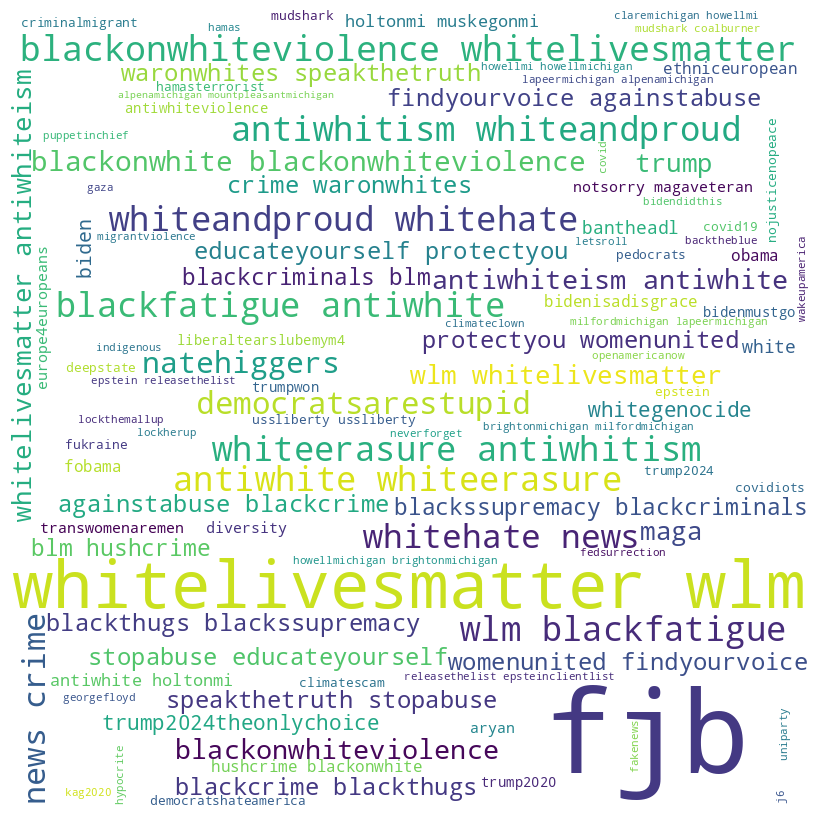

In [20]:
create_wordcloud(flat_hashtags_white)


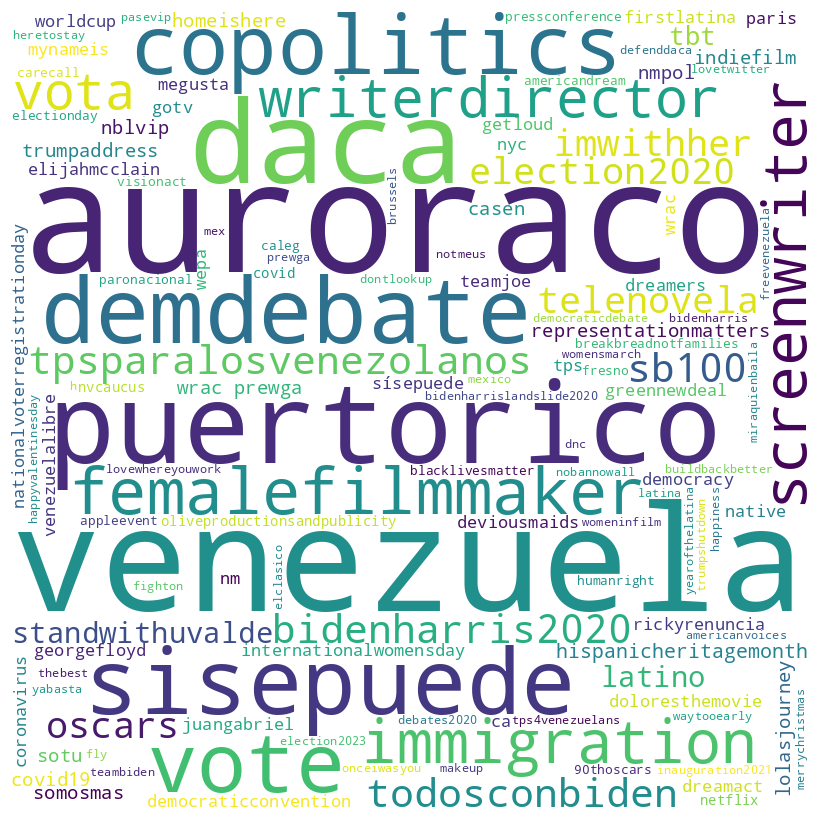

In [21]:
create_wordcloud(flat_hashtags_latin)


## Used Emoji

### First version

In [22]:
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

df_emojis_white = pd.DataFrame()
for column in df_white.columns:
    df_emojis_white[column + '_emojis'] = df_white[column].apply(extract_emojis)

all_emojis_w = ''.join(row for row in df_emojis_white.apply(lambda x: ''.join(x), axis=1))
emoji_counts_w = Counter(all_emojis_w)
print('White Emoji: ',emoji_counts_w)

White Emoji:  Counter({'🚫': 806, '⚡': 543, '😁': 218, '⭐': 203, '✨': 200, '🤣': 166, '🔥': 149, '🤍': 133, '🏻': 132, '❄': 129, '🏼': 125, '😂': 123, '💋': 106, '✝': 103, '🏴': 101, '✊': 100, '🌟': 100, '🧃': 100, '🏕': 100, '™': 99, '🗣': 99, '🌿': 98, '🔫': 98, '👶': 98, '💍': 98, '⚔': 96, '☀': 92, '❤': 35, '💯': 32, '❌': 32, '💥': 31, '👇': 29, '👉': 23, '😏': 22, '🚨': 21, '✔': 20, '😳': 17, '🤔': 17, '🆘': 16, '👑': 13, '📍': 13, '🔁': 12, '🤡': 12, '💢': 12, '⛔': 12, '🙄': 11, '♀': 10, '⚓': 10, '🎁': 10, '🎅': 10, '😡': 10, '♦': 10, '😭': 10, '⚠': 9, '🌈': 9, '‼': 9, '💪': 9, '🤬': 8, '👍': 8, '☢': 8, '⚫': 8, '🤷': 8, '😇': 8, '📌': 8, '🤐': 7, '👠': 7, '❗': 6, '🐐': 6, '☣': 6, '🐻': 6, '😋': 6, '🤯': 6, '🛑': 6, '😱': 6, '⬇': 6, '🎉': 6, '💙': 5, '😜': 5, '📝': 5, '👊': 4, '😆': 4, '❓': 4, '🌹': 4, '🙏': 4, '🎫': 4, '👁': 4, '▪': 4, '😉': 3, '\U0001faf5': 3, '👌': 3, '👋': 3, '🎄': 3, '🍷': 3, '😄': 3, '♂': 3, '📚': 3, '👎': 3, '🖊': 3, '😥': 3, '🙋': 2, '🥳': 2, '💩': 2, '📰': 2, '🗽': 2, '😫': 2, '🤗': 2, '🤥': 2, '\U0001fae1': 2, '🔴': 2, '🔵': 2, '🎯': 2,

In [23]:
df_emojis_latin = pd.DataFrame()
for column in df_latin.columns:
    df_emojis_latin[column + '_emojis'] = df_latin[column].apply(extract_emojis)

all_emojis_l = ''.join(row for row in df_emojis_latin.apply(lambda x: ''.join(x), axis=1))
emoji_counts_l = Counter(all_emojis_l)
print('Latin Emoji: ',emoji_counts_l)

Latin Emoji:  Counter({'🐾': 200, '🏻': 133, '💃': 111, '😃': 108, '🏽': 102, '🌹': 100, '☁': 100, '🧠': 100, '🐶': 100, '🐱': 100, '🪴': 100, '🟧': 100, '❓': 100, '🥑': 99, '❤': 74, '✨': 62, '🙏': 57, '🏾': 47, '😭': 38, '👏': 38, '🎉': 35, '👇': 29, '🤣': 26, '✊': 23, '🚨': 21, '👀': 20, '😂': 20, '💪': 15, '💙': 12, '😁': 12, '✅': 12, '🙌': 12, '😍': 11, '🎁': 11, '🙋': 11, '💯': 11, '🏼': 10, '👋': 10, '🎅': 10, '💚': 9, '🎂': 9, '♥': 8, '💋': 8, '❄': 8, '🧵': 7, '💛': 7, '😉': 7, '🔥': 7, '🌲': 7, '📸': 6, '\U0001faf6': 6, '💜': 6, '👉': 6, '💥': 6, '▫': 6, '💫': 5, '🥳': 5, '🥺': 5, '😊': 5, '✌': 5, '☀': 4, '😡': 4, '☕': 4, '🎊': 4, '💐': 4, '🎬': 4, '🤓': 4, '♂': 4, '🏿': 4, '🗳': 3, '🍻': 3, '😳': 3, '😰': 3, '😎': 3, '🗣': 3, '😱': 3, '🍾': 3, '🤔': 3, '🌟': 3, '🔹': 3, '🎼': 3, '🌎': 3, '⭐': 3, '📷': 3, '🎥': 3, '🤬': 3, '\U0001f979': 2, '🙊': 2, '😄': 2, '😐': 2, '🏝': 2, '🍰': 2, '🥁': 2, '😜': 2, '👨': 2, '⚽': 2, '😘': 2, '💍': 2, '📢': 2, '💕': 2, '🎓': 2, '🖐': 2, '🌞': 2, '✔': 2, '‼': 2, '🌱': 2, '🌴': 2, '🖤': 2, '🤠': 2, '🤍': 2, '⤵': 2, '❌': 2, '🦚': 1, '💝'

In [24]:
df_emojis_white.head(30)

,name_emojis,location_emojis,description_emojis,full_text_emojis
0,,,,🤬
1,,🤣,🏴⚔,
2,,🤣,🏴⚔,
3,,🤣,🏴⚔,
4,™,🌿💋⭐,🗣🔫👶🏻✝💍🚫,🙋🏻♀
5,,🤣,🏴⚔,🤣
6,,🤣,🏴⚔,
7,™,🌿💋⭐,🗣🔫👶🏻✝💍🚫,🔥🔥🔥🔥
8,,🤣,🏴⚔,🤣😏
9,,,😁😁😂,


In [25]:
df_emojis_latin

,name_emojis,location_emojis,description_emojis,full_text_emojis
0,,,,🧵
1,,,🦚,😭🥹
2,,,,
3,,,,
4,,,,
...,...,...,...,...
2608,,,,
2609,,,,
2610,,,,
2611,,,,


### Second version

In [26]:
def extract_emojis(text):
    return ''.join(e['emoji'] for e in emoji.emoji_list(text))

df_emojis_white = pd.DataFrame()

for column in df_white.columns:
    df_emojis_white[column + '_emojis'] = df_white[column].apply(extract_emojis)

all_emojis_w = ''.join(row for row in df_emojis_white.apply(lambda x: ''.join(x), axis=1))
emoji_counts_w = Counter(all_emojis_w)
print(emoji_counts_w)

Counter({'🚫': 806, '🇺': 654, '️': 549, '⚡': 543, '🇸': 248, '😁': 218, '🇦': 212, '🇲': 206, '⭐': 203, '✨': 200, '\U000e0067': 197, '🤣': 166, '🔥': 149, '🤍': 133, '🏻': 132, '❄': 129, '🏼': 125, '😂': 123, '💋': 106, '✝': 103, '🏴': 101, '\U000e0062': 100, '\U000e007f': 100, '✊': 100, '🌟': 100, '🧃': 100, '🏕': 100, '™': 99, '🗣': 99, '🌿': 98, '🔫': 98, '👶': 98, '💍': 98, '\U000e0065': 97, '\U000e006e': 97, '⚔': 96, '☀': 92, '❤': 35, '💯': 32, '❌': 32, '💥': 31, '👇': 29, '👉': 23, '😏': 22, '🚨': 21, '✔': 20, '😳': 17, '🤔': 17, '\u200d': 16, '🇱': 16, '🆘': 16, '👑': 13, '📍': 13, '🔁': 12, '🤡': 12, '💢': 12, '⛔': 12, '🇮': 11, '🙄': 11, '♀': 10, '⚓': 10, '🎁': 10, '🎅': 10, '😡': 10, '♦': 10, '🇳': 10, '😭': 10, '⚠': 9, '🌈': 9, '‼': 9, '💪': 9, '🤬': 8, '👍': 8, '☢': 8, '⚫': 8, '🤷': 8, '😇': 8, '📌': 8, '🇹': 7, '🤐': 7, '👠': 7, '❗': 6, '🐐': 6, '☣': 6, '🐻': 6, '😋': 6, '🤯': 6, '🛑': 6, '😱': 6, '⬇': 6, '🎉': 6, '💙': 5, '😜': 5, '📝': 5, '🇪': 5, '👊': 4, '😆': 4, '❓': 4, '🌹': 4, '🙏': 4, '🎫': 4, '👁': 4, '🇭': 4, '▪': 4, '😉': 3, '🇨': 3,

In [27]:
def extract_emojis(text):
    return ''.join(e['emoji'] for e in emoji.emoji_list(text))

df_emojis_latin = pd.DataFrame()
for column in df_latin.columns:
    df_emojis_latin[column + '_emojis'] = df_latin[column].apply(extract_emojis)

all_emojis_l = ''.join(row for row in df_emojis_latin.apply(lambda x: ''.join(x), axis=1))
emoji_counts_l = Counter(all_emojis_l)
print(emoji_counts_l)

Counter({'🇸': 614, '🇪': 533, '🇺': 514, '🇻': 431, '🇷': 371, '🇵': 370, '️': 224, '🇲': 220, '🐾': 200, '🏻': 133, '🇽': 118, '💃': 111, '😃': 108, '🇨': 106, '🏽': 102, '🇯': 102, '🇱': 101, '🇮': 100, '🌹': 100, '☁': 100, '🧠': 100, '🐶': 100, '🐱': 100, '🪴': 100, '🟧': 100, '❓': 100, '🇹': 99, '🥑': 99, '❤': 74, '✨': 62, '🙏': 57, '🏾': 47, '😭': 38, '👏': 38, '🎉': 35, '👇': 29, '🤣': 26, '✊': 23, '🚨': 21, '👀': 20, '😂': 20, '💪': 15, '💙': 12, '😁': 12, '⃣': 12, '✅': 12, '🙌': 12, '😍': 11, '🎁': 11, '🙋': 11, '💯': 11, '🏼': 10, '👋': 10, '🎅': 10, '💚': 9, '\u200d': 9, '🎂': 9, '♥': 8, '💋': 8, '❄': 8, '🧵': 7, '💛': 7, '😉': 7, '🔥': 7, '🌲': 7, '📸': 6, '\U0001faf6': 6, '💜': 6, '👉': 6, '💥': 6, '▫': 6, '💫': 5, '🥳': 5, '🥺': 5, '😊': 5, '✌': 5, '☀': 4, '😡': 4, '☕': 4, '🎊': 4, '💐': 4, '🎬': 4, '🤓': 4, '♂': 4, '🏿': 4, '0': 4, '🇭': 3, '🗳': 3, '🍻': 3, '🇦': 3, '5': 3, '😳': 3, '😰': 3, '😎': 3, '🇴': 3, '🗣': 3, '😱': 3, '🍾': 3, '🤔': 3, '🌟': 3, '🔹': 3, '🎼': 3, '🌎': 3, '⭐': 3, '📷': 3, '🎥': 3, '🤬': 3, '\U0001f979': 2, '🙊': 2, '😄': 2, '😐': 2, 

In [28]:
df_emojis_white.head(30)

,name_emojis,location_emojis,description_emojis,full_text_emojis
0,,,,🤬
1,,🤣,🇺🇸🏴󠁧󠁢󠁥󠁮󠁧󠁿⚔️,
2,,🤣,🇺🇸🏴󠁧󠁢󠁥󠁮󠁧󠁿⚔️,
3,,🤣,🇺🇸🏴󠁧󠁢󠁥󠁮󠁧󠁿⚔️,
4,™,🌿💋⭐,🇺🇸🗣🔫👶🏻✝️💍🚫,🙋🏻‍♀️
5,,🤣,🇺🇸🏴󠁧󠁢󠁥󠁮󠁧󠁿⚔️,🤣
6,,🤣,🇺🇸🏴󠁧󠁢󠁥󠁮󠁧󠁿⚔️,
7,™,🌿💋⭐,🇺🇸🗣🔫👶🏻✝️💍🚫,🔥🔥🔥🔥
8,,🤣,🇺🇸🏴󠁧󠁢󠁥󠁮󠁧󠁿⚔️,🤣😏
9,,,😁😁😂,


In [29]:
df_emojis_latin.head()

,name_emojis,location_emojis,description_emojis,full_text_emojis
0,,,,🧵
1,,,🦚🇵🇭🇲🇽,😭🥹
2,,,,
3,,,,
4,,,,


In [30]:
specific_emoji = "🏴"
emoji_count = emoji_counts_w.get(specific_emoji, 0)
print(f"Count of {specific_emoji}: {emoji_count}")

Count of 🏴: 101


# Preprocess cont


Remove emojis or encode them?

In [31]:
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()

    def replace_emoji(match):
        return " " + emoji.demojize(match.group(0)).replace(':', '') + " "
    text = re.sub(r'[^\w\s,]', replace_emoji, text)
    text = text.replace('_', ' ')
    return text

In [32]:
df_prep_latin['cleaned_text'] = df_prep_latin['full_text_processed'].apply(preprocess_text)
df_prep_white['cleaned_text'] = df_prep_white['full_text_processed'].apply(preprocess_text)

In [33]:
df_prep_latin.head(30)

,name,location,description,full_text_processed,cleaned_text
0,Astrid Galván,"El Paso, TX",Editor at Axios Latino. Former AP reporter.,"🧵 In 42 minutes, Axios Latino is publishing a ...",thread in 42 minutes axios latino is publish...
1,Jackie Montalvo | ᜇᜒᜌᜃᜒ,"New York, NY",Producer-Shooter-Editor @NBCNewsNow @NBCNews @...,Still crying 😭🥹 so so thankful !!!!,still crying loudly crying face face holding...
2,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",I applaud former Vice President @JoeBiden for ...,i applaud former vice president joebiden for h...
3,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",Dolores Huerta: Recall of Newsom would be bad ...,dolores huerta recall of newsom would be bad n...
4,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",Vote NO on the CA Special Recall Election. Our...,vote no on the ca special recall election our ...
5,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",I offered to translate &amp; Bernie supporters...,i offered to translate amp bernie supporters c...
6,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",I received my first #COVID-19 vaccine courtesy...,i received my first covid19 vaccine courtesy o...
7,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",@BernieSanders Shame on your supporters for de...,berniesanders shame on your supporters for dep...
8,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...","Thank you, Amiga! Wishing you good health duri...",thank you amiga wishing you good health during...
9,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",I grieve the youth who lost their lives. Thank...,i grieve the youth who lost their lives thankf...


In [34]:
df_prep_white.head(30)

,name,location,description,full_text_processed,cleaned_text
0,𝕯𝖗 𝖔𝖋 𝕮𝖗𝖎𝖙𝖎𝖈𝖆𝖑 𝕭𝖆𝖘𝖘 𝕿𝖍𝖊𝖔𝖗𝖞,North Yorkshire,Phd in theories of critical bass. Ex junglist.,@ripx4nutmeg Dear @ThamesVP those young boys w...,ripx4nutmeg dear thamesvp those young boys wer...
1,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"As a Vet, I can truly say, unequivocally, you ...",as a vet i can truly say unequivocally you sic...
2,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"Why??\n\nCuz his father, #Biden, is the Pedo i...",why\n\ncuz his father biden is the pedo in chi...
3,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,You closed our businesses!\n\nPut people out o...,you closed our businesses\n\nput people out of...
4,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...","Me, right here. 🙋🏻‍♀️",me right here person raising hand light skin...
5,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,Poor little fella! 🤣\n\n#NotSorry\n\n#MagaVete...,poor little fella rolling on the floor laughi...
6,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,#MikePence was supposed to send 2020 baIIots i...,mikepence was supposed to send 2020 baiiots in...
7,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...",🔥🔥 No questions asked! 🔥🔥,fire fire no questions asked fire fire
8,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"To the Lib fools trolling me, all of whom don'...",to the lib fools trolling me all of whom dont ...
9,D.B #Gammon,"North East, England",A no nonsense Geordie lass. You might know me?...,I'm the poem Twitter writer\nI scribble and I ...,im the poem twitter writer\ni scribble and i r...


In [35]:
total_newlines = df_prep_white['cleaned_text'].str.count(r'\n\s*').sum()
print(f"Total '\\n' characters including whitespace after: {total_newlines}")

Total '\n' characters including whitespace after: 1778


In [36]:
total_newlines = df_prep_latin['cleaned_text'].str.count(r'\n\s*').sum()
print(f"Total '\\n' characters including whitespace after: {total_newlines}")

Total '\n' characters including whitespace after: 1324


In [37]:
df_prep_white.head(30)

,name,location,description,full_text_processed,cleaned_text
0,𝕯𝖗 𝖔𝖋 𝕮𝖗𝖎𝖙𝖎𝖈𝖆𝖑 𝕭𝖆𝖘𝖘 𝕿𝖍𝖊𝖔𝖗𝖞,North Yorkshire,Phd in theories of critical bass. Ex junglist.,@ripx4nutmeg Dear @ThamesVP those young boys w...,ripx4nutmeg dear thamesvp those young boys wer...
1,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"As a Vet, I can truly say, unequivocally, you ...",as a vet i can truly say unequivocally you sic...
2,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"Why??\n\nCuz his father, #Biden, is the Pedo i...",why\n\ncuz his father biden is the pedo in chi...
3,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,You closed our businesses!\n\nPut people out o...,you closed our businesses\n\nput people out of...
4,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...","Me, right here. 🙋🏻‍♀️",me right here person raising hand light skin...
5,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,Poor little fella! 🤣\n\n#NotSorry\n\n#MagaVete...,poor little fella rolling on the floor laughi...
6,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,#MikePence was supposed to send 2020 baIIots i...,mikepence was supposed to send 2020 baiiots in...
7,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...",🔥🔥 No questions asked! 🔥🔥,fire fire no questions asked fire fire
8,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"To the Lib fools trolling me, all of whom don'...",to the lib fools trolling me all of whom dont ...
9,D.B #Gammon,"North East, England",A no nonsense Geordie lass. You might know me?...,I'm the poem Twitter writer\nI scribble and I ...,im the poem twitter writer\ni scribble and i r...


## Replace \\n with whitespace

In [38]:
df_prep_white['cleaned_text'] = df_prep_white['cleaned_text'].str.replace('\n', ' ')
df_prep_latin['cleaned_text'] = df_prep_latin['cleaned_text'].str.replace('\n', ' ')

df_prep_white.head(30)

,name,location,description,full_text_processed,cleaned_text
0,𝕯𝖗 𝖔𝖋 𝕮𝖗𝖎𝖙𝖎𝖈𝖆𝖑 𝕭𝖆𝖘𝖘 𝕿𝖍𝖊𝖔𝖗𝖞,North Yorkshire,Phd in theories of critical bass. Ex junglist.,@ripx4nutmeg Dear @ThamesVP those young boys w...,ripx4nutmeg dear thamesvp those young boys wer...
1,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"As a Vet, I can truly say, unequivocally, you ...",as a vet i can truly say unequivocally you sic...
2,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"Why??\n\nCuz his father, #Biden, is the Pedo i...",why cuz his father biden is the pedo in chief...
3,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,You closed our businesses!\n\nPut people out o...,you closed our businesses put people out of w...
4,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...","Me, right here. 🙋🏻‍♀️",me right here person raising hand light skin...
5,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,Poor little fella! 🤣\n\n#NotSorry\n\n#MagaVete...,poor little fella rolling on the floor laughi...
6,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,#MikePence was supposed to send 2020 baIIots i...,mikepence was supposed to send 2020 baiiots in...
7,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...",🔥🔥 No questions asked! 🔥🔥,fire fire no questions asked fire fire
8,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"To the Lib fools trolling me, all of whom don'...",to the lib fools trolling me all of whom dont ...
9,D.B #Gammon,"North East, England",A no nonsense Geordie lass. You might know me?...,I'm the poem Twitter writer\nI scribble and I ...,im the poem twitter writer i scribble and i rh...


## Deleting extra whitespaces

In [41]:
df_prep_white['cleaned_text']= df_prep_white['cleaned_text'].str.replace(r'\s+', ' ')
df_prep_latin['cleaned_text']= df_prep_latin['cleaned_text'].str.replace(r'\s+', ' ')

df_prep_white.head(30)

,name,location,description,full_text_processed,cleaned_text
0,𝕯𝖗 𝖔𝖋 𝕮𝖗𝖎𝖙𝖎𝖈𝖆𝖑 𝕭𝖆𝖘𝖘 𝕿𝖍𝖊𝖔𝖗𝖞,North Yorkshire,Phd in theories of critical bass. Ex junglist.,@ripx4nutmeg Dear @ThamesVP those young boys w...,ripx4nutmeg dear thamesvp those young boys wer...
1,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"As a Vet, I can truly say, unequivocally, you ...",as a vet i can truly say unequivocally you sic...
2,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"Why??\n\nCuz his father, #Biden, is the Pedo i...",why cuz his father biden is the pedo in chief...
3,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,You closed our businesses!\n\nPut people out o...,you closed our businesses put people out of w...
4,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...","Me, right here. 🙋🏻‍♀️",me right here person raising hand light skin...
5,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,Poor little fella! 🤣\n\n#NotSorry\n\n#MagaVete...,poor little fella rolling on the floor laughi...
6,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,#MikePence was supposed to send 2020 baIIots i...,mikepence was supposed to send 2020 baiiots in...
7,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...",🔥🔥 No questions asked! 🔥🔥,fire fire no questions asked fire fire
8,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"To the Lib fools trolling me, all of whom don'...",to the lib fools trolling me all of whom dont ...
9,D.B #Gammon,"North East, England",A no nonsense Geordie lass. You might know me?...,I'm the poem Twitter writer\nI scribble and I ...,im the poem twitter writer i scribble and i rh...


## Dropping rows with less than 3 characters

In [47]:
filtered_df_w = df_prep_white[df_prep_white['cleaned_text'].str.len() < 3]

print(filtered_df_w.shape)
filtered_df_w.head(30)

(44, 5)


,name,location,description,full_text_processed,cleaned_text
19,chaz,,Jesus is my commanding General. I will fight f...,,
25,chaz,,Jesus is my commanding General. I will fight f...,,
63,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...",,
87,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...",,
162,chaz,,Jesus is my commanding General. I will fight f...,,
173,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...",,
182,K.K. Lynn🇺🇸. White and Proud!!!!!,"Lindsborg, Kansas","Retired History Teacher, Librarian, Golf and C...",,
183,chaz,,Jesus is my commanding General. I will fight f...,,
197,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...",,
204,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...",,


In [48]:
filtered_df_l = df_prep_latin[df_prep_latin['cleaned_text'].str.len() < 3]
print(filtered_df_l.shape)
filtered_df_l.head(30)

(13, 5)


,name,location,description,full_text_processed,cleaned_text
43,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",,
213,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",,
248,Dolores Huerta,,"Founder & President, @DoloresHuertaFD; Co-foun...",,
395,Leopoldo Martínez Nucete,"Washington, DC",President Biden’s Nominee for U.S. Executive D...,,
658,Juan Marcano,"Aurora, CO","🇵🇷 He/His/El 🌹 Brother, husband, tío, communit...",,
1551,Ana Pérez Mackenzie,"Austin, TX",Realtor at KW Austin- Connector - Project Deve...,,
1613,Cucho Vivas 🟧,"Fairfax Station, Va",Venezuelan-American. 🇺🇸🇻🇪 Dog person🐾🐾. DM=Blo...,,
2063,Cucho Vivas 🟧,"Fairfax Station, Va",Venezuelan-American. 🇺🇸🇻🇪 Dog person🐾🐾. DM=Blo...,,
2274,José Díaz-Balart,USA,"Anchor, “José Díaz-Balart Reports” @JDBalartMS...",,
2317,José Díaz-Balart,USA,"Anchor, “José Díaz-Balart Reports” @JDBalartMS...",,


In [49]:
df_prep_latin = df_prep_latin.drop(filtered_df_l.index)
df_prep_white = df_prep_white.drop(filtered_df_w.index)


index 19 dropped

In [50]:
df_prep_white.head(30)

,name,location,description,full_text_processed,cleaned_text
0,𝕯𝖗 𝖔𝖋 𝕮𝖗𝖎𝖙𝖎𝖈𝖆𝖑 𝕭𝖆𝖘𝖘 𝕿𝖍𝖊𝖔𝖗𝖞,North Yorkshire,Phd in theories of critical bass. Ex junglist.,@ripx4nutmeg Dear @ThamesVP those young boys w...,ripx4nutmeg dear thamesvp those young boys wer...
1,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"As a Vet, I can truly say, unequivocally, you ...",as a vet i can truly say unequivocally you sic...
2,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"Why??\n\nCuz his father, #Biden, is the Pedo i...",why cuz his father biden is the pedo in chief...
3,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,You closed our businesses!\n\nPut people out o...,you closed our businesses put people out of w...
4,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...","Me, right here. 🙋🏻‍♀️",me right here person raising hand light skin...
5,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,Poor little fella! 🤣\n\n#NotSorry\n\n#MagaVete...,poor little fella rolling on the floor laughi...
6,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,#MikePence was supposed to send 2020 baIIots i...,mikepence was supposed to send 2020 baiiots in...
7,𝓒𝓸𝓷𝓼𝓮𝓻𝓿𝓪𝓽𝓲𝓿𝓮 𝓓𝓲𝓿𝓪♔™ 𝕏,Live 🌿 Love💋Sparkle ⭐️,"Creating candid, cerebral, Conservative conten...",🔥🔥 No questions asked! 🔥🔥,fire fire no questions asked fire fire
8,Shawn Hawkins,"In Liberal Heads, RENT FREE!🤣",Pvt Mil Ctr Vet🇺🇸4Dialects🏴󠁧󠁢󠁥󠁮󠁧󠁿Born in & liv...,"To the Lib fools trolling me, all of whom don'...",to the lib fools trolling me all of whom dont ...
9,D.B #Gammon,"North East, England",A no nonsense Geordie lass. You might know me?...,I'm the poem Twitter writer\nI scribble and I ...,im the poem twitter writer i scribble and i rh...


# Merge 2 dataframe

In [51]:
df_prep_white['race'] = 'white'
df_prep_latin['race'] = 'latin'

In [56]:
df_prep_white.head()
print(df_prep_white.shape)
print(df_prep_latin.shape)


(1525, 6)
(2600, 6)


In [57]:
df_merged = pd.concat([df_prep_white, df_prep_latin], ignore_index=True)
columns_to_drop = ['name', 'location', 'description','full_text_processed']
df_merged = df_merged.drop(columns=columns_to_drop)
print(df_merged.shape)
df_merged.head()

(4125, 2)


,cleaned_text,race
0,ripx4nutmeg dear thamesvp those young boys wer...,white
1,as a vet i can truly say unequivocally you sic...,white
2,why cuz his father biden is the pedo in chief...,white
3,you closed our businesses put people out of w...,white
4,me right here person raising hand light skin...,white


In [59]:
df_merged.tail()

,cleaned_text,race
4120,nm republican yvette4congress goes on fox news...,latin
4121,and let ’ s not forget the plan de san diego i...,latin
4122,this was a deeply personal story to research a...,latin
4123,cuban americans in south florida were outraged...,latin
4124,murals by el paso chicano artists created to g...,latin


# Binary Classification TFIDF Vectorizer- LOGREG MODEL

In [62]:
df_merged['race_binary'] = df_merged['race'].apply(lambda x: 0 if x == 'white' else 1)
columns_to_drop = ['race']
df_merged = df_merged.drop(columns=columns_to_drop)
df_merged.head()

,cleaned_text,race_binary
0,ripx4nutmeg dear thamesvp those young boys wer...,0
1,as a vet i can truly say unequivocally you sic...,0
2,why cuz his father biden is the pedo in chief...,0
3,you closed our businesses put people out of w...,0
4,me right here person raising hand light skin...,0


In [64]:
X = df_merged['cleaned_text']
y = df_merged['race_binary']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3300,)
(825,)
(3300,)
(825,)


In [66]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

converts the text data into a numerical format with 13331 column(tfidf)

In [67]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [71]:
y_pred = model.predict(X_test_vec)


In [79]:
print(X_train_vec.shape)
print(X_test_vec.shape)

print(y_pred.shape)

(3300, 13331)
(825, 13331)
(825,)


## Wrong predictions in df

In [93]:
predictions_df = pd.DataFrame({
    'text': X_test,
    'actual_label': y_test,
    'predicted_label': y_pred
})

predictions_df['actual_race'] = predictions_df['actual_label'].apply(lambda x: 'white' if x == 0 else 'latin')
predictions_df['predicted_race'] = predictions_df['predicted_label'].apply(lambda x: 'white' if x == 0 else 'latin')

wrong_predictions_df = predictions_df[predictions_df['actual_label'] != predictions_df['predicted_label']]
wrong_predictions_df = wrong_predictions_df[['text','actual_race', 'predicted_race']]
race_predictions_count = wrong_predictions_df.groupby(['actual_race', 'predicted_race']).size().unstack().fillna(0).astype(int)

print(race_predictions_count.to_string())
print('#################################')
print(wrong_predictions_df.shape)

predicted_race  latin  white
actual_race                 
latin               0     12
white             130      0
#################################
(142, 3)


In [88]:
wrong_predictions_df.head(30)

,text,actual_race,predicted_race
1263,keithwoodsyt the true origin of the term final...,white,latin
1320,no one gains on less than 1000 calories...,white,latin
718,joe bidens handlers called a lid around noon t...,white,latin
1907,last night i learned that i cant wink flushed...,latin,white
505,lauara loomer won her primary in florida even ...,white,latin
408,page with curl hawleymo says it this way … ...,white,latin
109,immature selfrighteous racebaiting bitch insta...,white,latin
1146,an 87 year old german woman was given 8 months...,white,latin
3611,bill mahers show is literally what white supre...,latin,white
2987,this is what whiteprivilege looks like,latin,white


In [83]:
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy is:", accuracy)

Accuracy: 0.8278787878787879
